## Visualization of Crime Data,
### City of Mesa, Az

The data used for this analysis is provided by the City of Mesa, Data Portal. The data is gathered through the Uniform Crime Reporting Program. The program collects statistics on the number of offenses known to City of Mesa Police Department. Address and Location data are not exact location of incidents and have been rounded to nearest hundred block. Lat/Long are approximations only based on rounded hundred block. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv("Crime_Reporting_Statistics.csv")

In [3]:
df.columns

Index(['Crime ID', 'Crime Type', 'Report Date', 'Report Month', 'Report Year',
       'Occurred Date', 'Address', 'Street Number', 'Street Direction',
       'Street Name', 'Street Type', 'Latitude', 'Longitude', 'City', 'Zip',
       'Location 1', 'RowID'],
      dtype='object')

In [4]:
df.rename(columns={'Crime ID':'crime_id'}, inplace = True) 
df.rename(columns={'Crime Type':'crime_type'}, inplace = True) 
df.rename(columns={'Report Date':'report_date'}, inplace = True) 
df.rename(columns={'Report Month':'report_month'}, inplace = True) 
df.rename(columns={'Report Year':'report_year'}, inplace = True)
df.rename(columns={'Occurred Date':'occurred_date'}, inplace = True) 
df.rename(columns={'Street Number':'street_number'}, inplace = True)
df.rename(columns={'Street Direction':'street_direction'}, inplace = True) 
df.rename(columns={'Street Name':'street_name'}, inplace = True) 
df.rename(columns={'Street Type':'street_type'}, inplace = True) 
df.rename(columns={'Location 1':'location_1'}, inplace = True) 

In [5]:
df.head()

,crime_id,crime_type,report_date,report_month,report_year,occurred_date,Address,street_number,street_direction,street_name,street_type,Latitude,Longitude,City,Zip,location_1,RowID
0,20110010108,Larceny,01/01/2011,Jan,2011,01/01/2011,800 Block of E SOUTHERN AVE,800.0,E,SOUTHERN,AVE,33.393129,-111.813718,MESA,85204.0,"(33.393129, -111.813718)",201100101081
1,20110010112,Aggravated Assault,01/01/2011,Jan,2011,01/01/2011,1800 Block of E BASELINE RD,1800.0,E,BASELINE,RD,33.378690,-111.792200,MESA,85204.0,"(33.37869, -111.7922)",201100101121
2,20110010198,Motor Vehicle Theft,01/01/2011,Jan,2011,01/01/2011,600 Block of W 2ND AVE,600.0,W,2ND,AVE,33.411559,-111.844574,MESA,85210.0,"(33.411559, -111.844574)",201100101981
3,20110010204,Larceny,01/01/2011,Jan,2011,01/01/2011,600 Block of W 2ND AVE,600.0,W,2ND,AVE,33.411559,-111.844574,MESA,85210.0,"(33.411559, -111.844574)",201100102041
4,20110010225,Aggravated Assault,01/01/2011,Jan,2011,12/31/2010,1800 Block of N STAPLEY DR,1800.0,N,STAPLEY,DR,33.448605,-111.804692,MESA,85203.0,"(33.448605, -111.804692)",201100102251


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105748 entries, 0 to 105747
Data columns (total 17 columns):
crime_id            105748 non-null int64
crime_type          105748 non-null object
report_date         105748 non-null object
report_month        105748 non-null object
report_year         105748 non-null int64
occurred_date       103353 non-null object
Address             105746 non-null object
street_number       105711 non-null float64
street_direction    105333 non-null object
street_name         105333 non-null object
street_type         93088 non-null object
Latitude            105333 non-null float64
Longitude           105333 non-null float64
City                105744 non-null object
Zip                 105700 non-null float64
location_1          105333 non-null object
RowID               105748 non-null int64
dtypes: float64(4), int64(3), object(10)
memory usage: 13.7+ MB


In [7]:
df.isnull().sum()

crime_id                0
crime_type              0
report_date             0
report_month            0
report_year             0
occurred_date        2395
Address                 2
street_number          37
street_direction      415
street_name           415
street_type         12660
Latitude              415
Longitude             415
City                    4
Zip                    48
location_1            415
RowID                   0
dtype: int64

In [8]:
df.fillna(value = 'na', inplace=True)

In [9]:
#df.isnull().sum()

In [10]:
df.drop(['RowID', 'occurred_date', 'location_1', 'City'], axis=1, inplace=True)

In [11]:
df.crime_type.describe()

count      105748
unique          9
top       Larceny
freq        68616
Name: crime_type, dtype: object

In [12]:
# Top 5 crime types
df.crime_type.value_counts().head()

Larceny                68616
Burglary               16567
Aggravated Assault      9107
Motor Vehicle Theft     6004
Robbery                 3302
Name: crime_type, dtype: int64

### Larceny, Burglary, Aggravated Assault, Motor Vehicle Theft and Robbery seem to occure more frequently than other types of crime in Mesa.

In [13]:
# crime in different zipcodes
df['Zip'].value_counts()

85201.0    17485
85204.0    15466
85202.0    12924
85210.0    12208
85206.0     9766
85209.0     8204
85203.0     7210
85205.0     6424
85213.0     4608
85208.0     3568
85207.0     3547
85212.0     2339
85215.0     1679
0.0          180
na            48
85220.0       15
85234.0       15
85338.0       11
85233.0        8
85281.0        7
85282.0        4
85257.0        2
85251.0        2
85225.0        2
85016.0        2
85015.0        1
85392.0        1
85014.0        1
85018.0        1
85009.0        1
85022.0        1
85042.0        1
85043.0        1
85120.0        1
85006.0        1
85296.0        1
85353.0        1
85351.0        1
85297.0        1
85250.0        1
85295.0        1
85283.0        1
85211.0        1
12314.0        1
85218.0        1
85224.0        1
85238.0        1
85242.0        1
95210.0        1
Name: Zip, dtype: int64

### 85201, 85202, 85203, 85204, 85205, 85206, 85207,85208, 85209, 85210, 85212, 85213, 85215 are the zipcodes with highest occurance of crime. 

In [14]:
df['street_name'].value_counts().head()

MAIN          8301
SOUTHERN      7049
DOBSON        5460
BROADWAY      3701
UNIVERSITY    3591
Name: street_name, dtype: int64

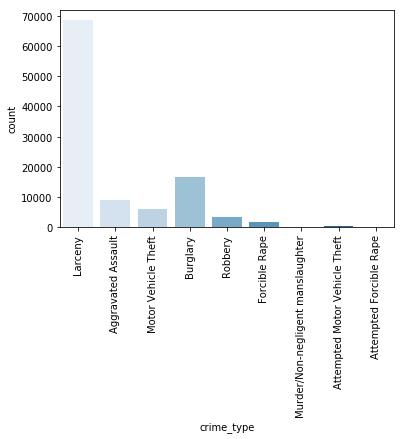

In [15]:
sns.countplot(x="crime_type", data=df, palette="Blues")
plt.xticks(rotation = 90);

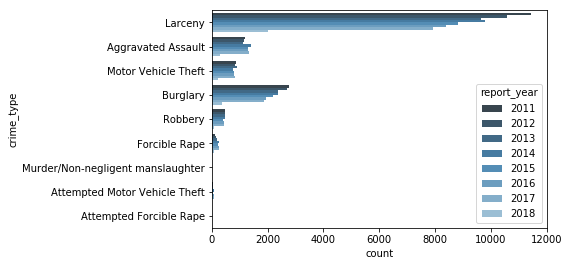

In [16]:
sns.countplot(y="crime_type", hue="report_year", data=df, palette="Blues_d");

### Feature Engineering

In [17]:
from datetime import datetime

In [18]:
df['report_date']=[datetime.strptime(x, '%m/%d/%Y') for x in df['report_date']]

In [19]:
df['report_date']=pd.to_datetime(df['report_date'])

In [20]:
df['Day_of_Week']= df['report_date'].apply(lambda time:time.dayofweek)

In [21]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['Day_of_Week']=df['Day_of_Week'].map(dmap)

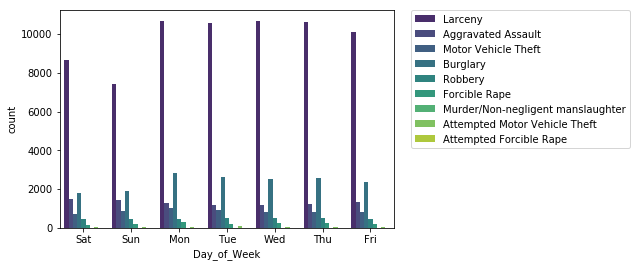

In [23]:
sns.countplot(x='Day_of_Week', data=df, hue='crime_type', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.);

In [24]:
df['month']= df['report_date'].apply(lambda time:time.month)

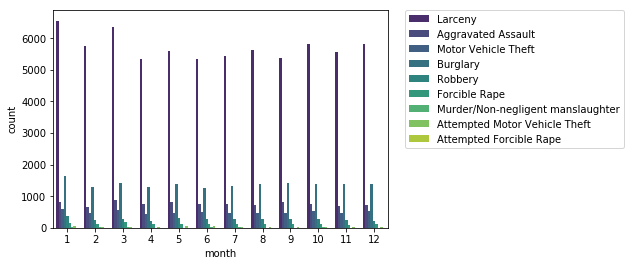

In [25]:
sns.countplot(x='month', data=df, hue='crime_type', palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.);

In [26]:
by_month = df.groupby('month').count()

In [27]:
by_month.head()

,crime_id,crime_type,report_date,report_month,report_year,Address,street_number,street_direction,street_name,street_type,Latitude,Longitude,Zip,Day_of_Week
month,,,,,,,,,,,,,,
1,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173,10173
2,8585,8585,8585,8585,8585,8585,8585,8585,8585,8585,8585,8585,8585,8585
3,9725,9725,9725,9725,9725,9725,9725,9725,9725,9725,9725,9725,9725,9725
4,8208,8208,8208,8208,8208,8208,8208,8208,8208,8208,8208,8208,8208,8208
5,8756,8756,8756,8756,8756,8756,8756,8756,8756,8756,8756,8756,8756,8756


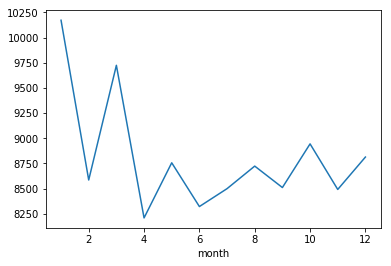

In [28]:
by_month['crime_id'].plot();

In [29]:
df['date']= df['report_date'].apply(lambda t:t.date())

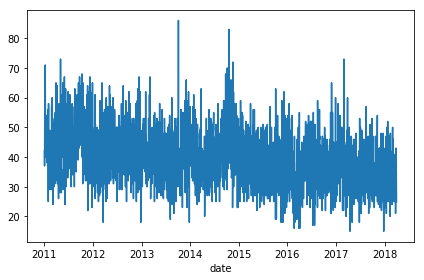

In [30]:
df.groupby('date').count()['Latitude'].plot()
plt.tight_layout()

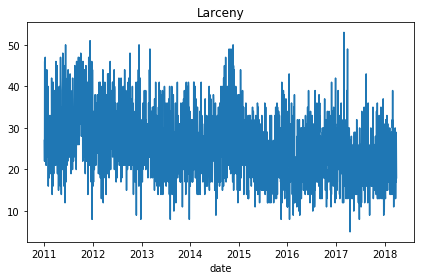

In [31]:
df[df['crime_type']=='Larceny'].groupby('date').count()['Latitude'].plot()
plt.title('Larceny')
plt.tight_layout()

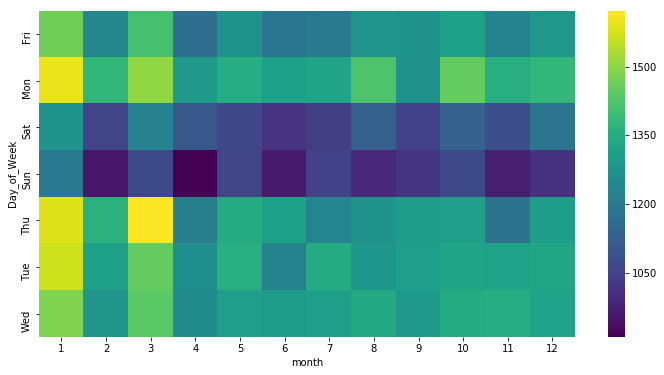

In [32]:
daymonth = df.groupby(['Day_of_Week','month']).count()['Latitude'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(daymonth, cmap='viridis')

### The least number of offences occure in Saturdays and Sundays through out the year. In Januaries, the most crimes occure in Mondays,Tuesdays and Tuesdays. In March, Mondays and Thursdays are the days of the week that most offences take place. 